In [15]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
db = pymysql.connect(user="root",
                     password="@Mandar6607",
                     host="localhost")
print(db)

In [3]:
query = "SELECT * FROM bank.customer"

In [6]:
df = pd.read_sql(query, db)

In [7]:
df.head()

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [14]:
#df.isnull().sum()                                 #No null values

In [12]:
df.rename(columns={"ï»¿Client ID": "Client_Id"}, inplace=True)

In [19]:
col = df.columns
col

Index(['Client_Id', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId'],
      dtype='object')

In [16]:
df.shape

(3000, 25)

In [27]:
df.nunique()

Client_Id                   2940
Name                        2913
Age                           69
Location ID                 2890
Joined Bank                 2579
Banking Contact               49
Nationality                    5
Occupation                   195
Fee Structure                  3
Loyalty Classification         4
Estimated Income            3000
Superannuation Savings      2997
Amount of Credit Cards         3
Credit Card Balance         2996
Bank Loans                  2973
Bank Deposits               2967
Checking Accounts           2967
Saving Accounts             2967
Foreign Currency Account    3000
Business Lending            2987
Properties Owned               4
Risk Weighting                 5
BRId                           4
GenderId                       2
IAId                          22
dtype: int64

In [44]:
#Changing Gender data and its datatype into appropriate form and also changing column name

df['GenderId'] = df['GenderId'].replace({1: 'Male', 2: 'Female'}).astype(str)
df.rename(columns={"GenderId": "Gender"}, inplace=True)

In [45]:
#Changing Gender data and its datatype into appropriate form and also changing column name

df['BRId'] = df['BRId'].replace({1: 'Retail', 2: 'Institutional', 3: 'Private Bank', 4: 'Commercial'}).astype(str)
df.rename(columns={"BRId": "Banking Relationship"}, inplace=True)

In [28]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

<Axes: xlabel='Income Band'>

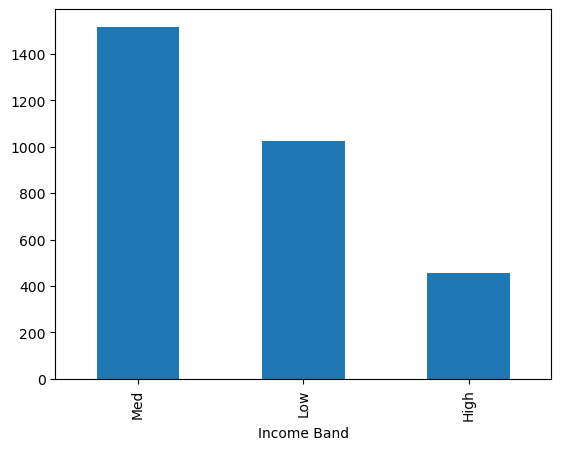

In [30]:
df['Income Band'].value_counts().plot(kind='bar')

In [46]:
#Examine the distribution of unique cataegories in categorical columns

cat = df[["IAId", "Banking Relationship", "Gender", "Amount of Credit Cards", "Nationality", "Fee Structure", 
          "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]]

for i in cat:
    print("Value Counts for ", i)
    print(df[i].value_counts())
    print()
    

Value Counts for  IAId
IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for  Banking Relationship
Banking Relationship
Private Bank     1352
Retail            660
Institutional     495
Commercial        493
Name: count, dtype: int64

Value Counts for  Gender
Gender
Female    1512
Male      1488
Name: count, dtype: int64

Value Counts for  Amount of Credit Cards
Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for  Nationality
Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for  Fee Structure
Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for  Loyalty Classification
Loyalty Classification


## Univariate Analysis

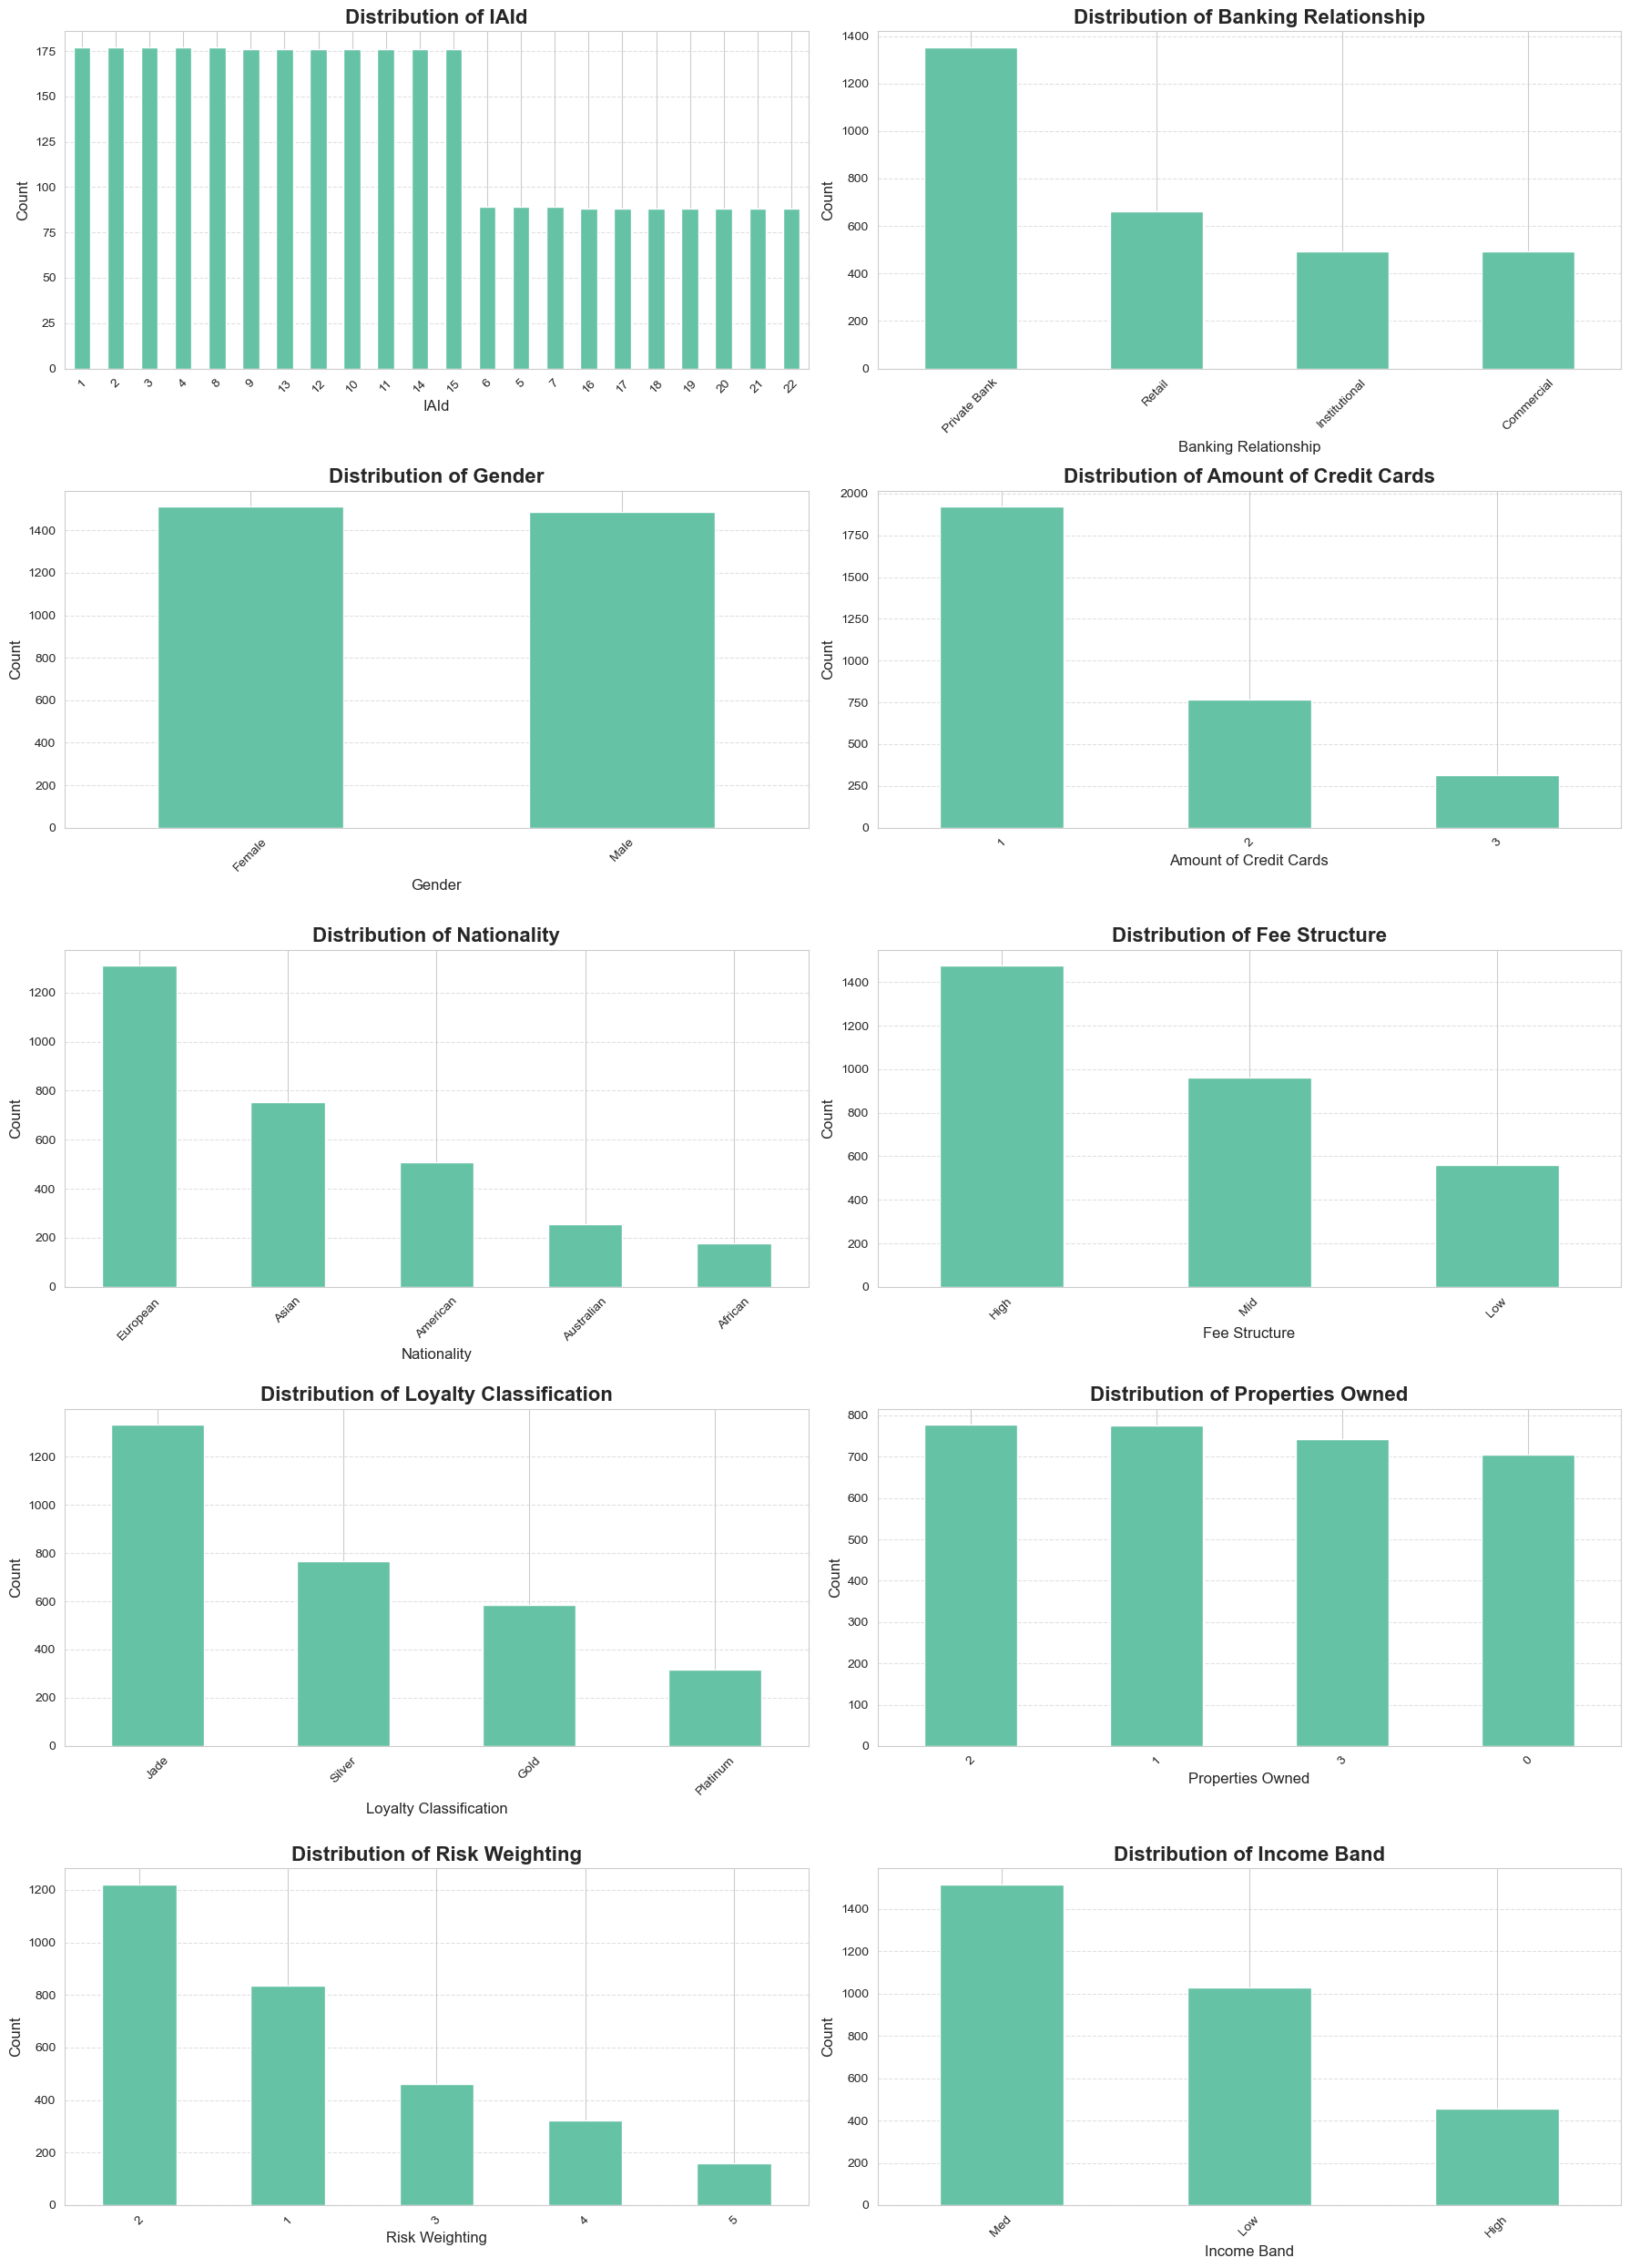

In [49]:
#Graphical Distribution of categorical data

plt.figure(figsize=[18, 25])

sns.set_style("whitegrid")               # Clean background
sns.set_palette("Set2")                  # Soft and beautiful colors

for c, col in enumerate(cat, 1):
    plt.subplot(5, 2, c)
    df[col].value_counts().plot.bar()
    
    plt.title(f"Distribution of {col}", fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Bivariate Analysis

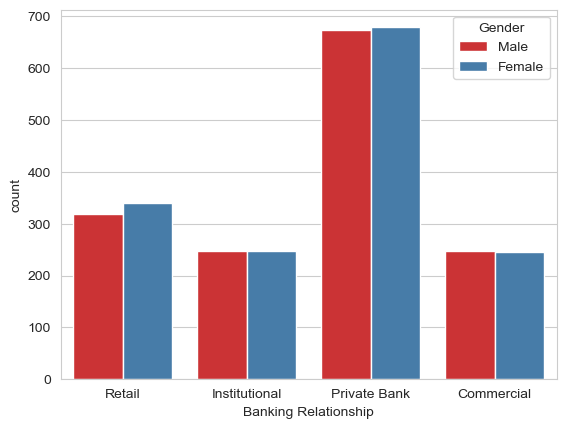

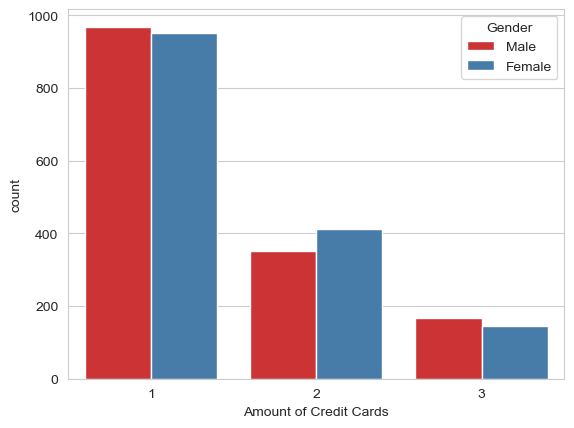

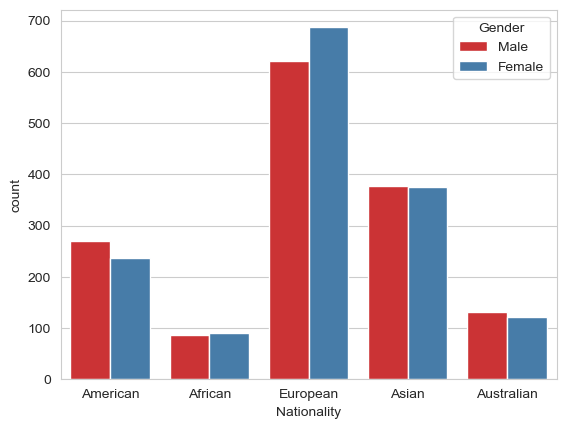

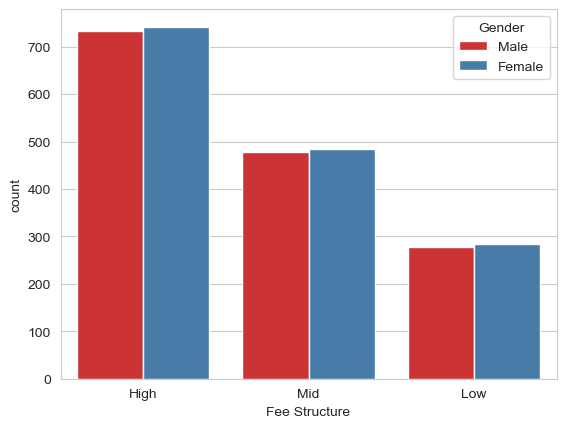

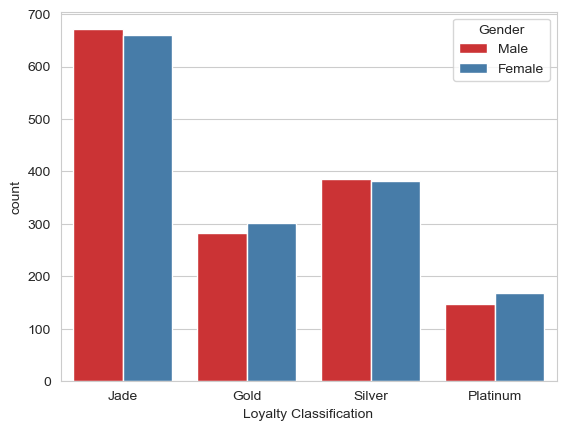

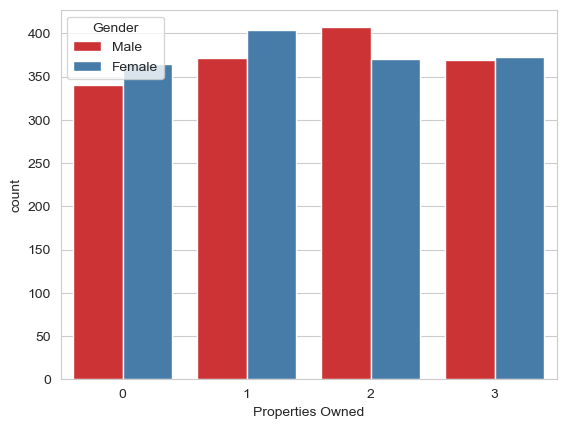

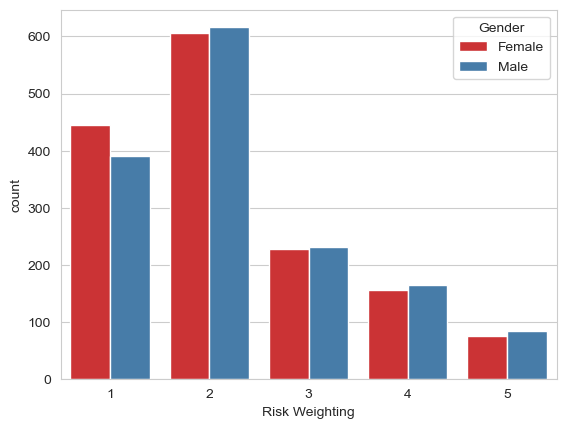

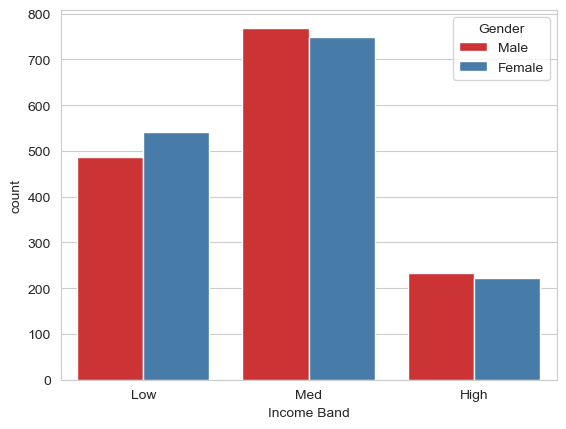

In [56]:
sns.set_style("whitegrid")               # Clean background
sns.set_palette("Set1")                  # Soft and beautiful colors

for i, predictor in enumerate(df[["Banking Relationship", "Amount of Credit Cards", "Nationality", "Fee Structure", 
          "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]]):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Gender')

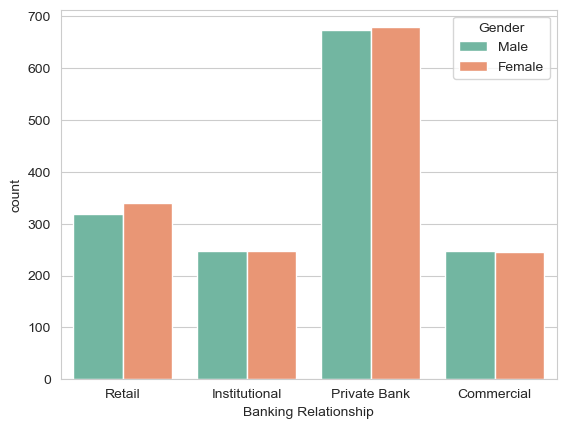

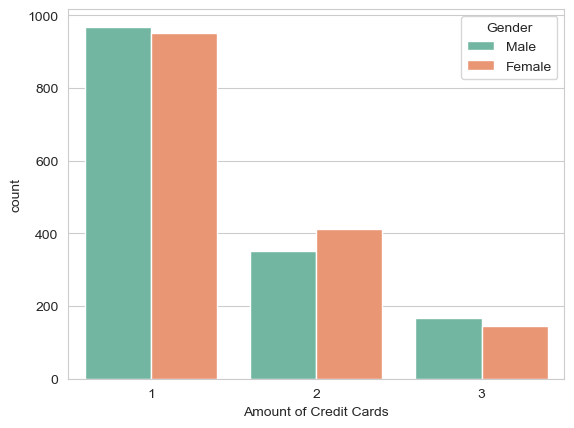

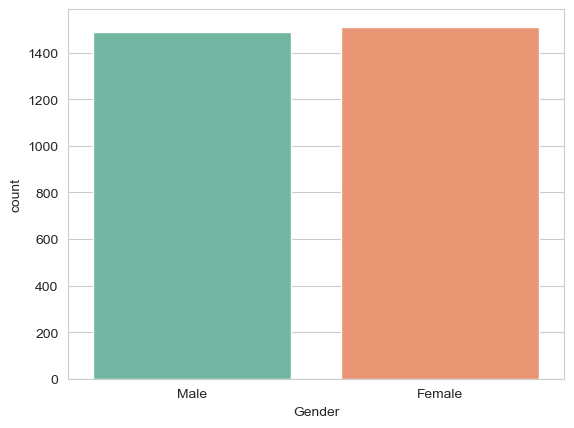

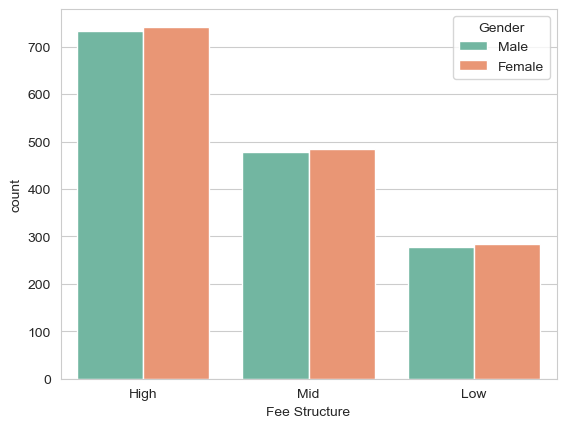

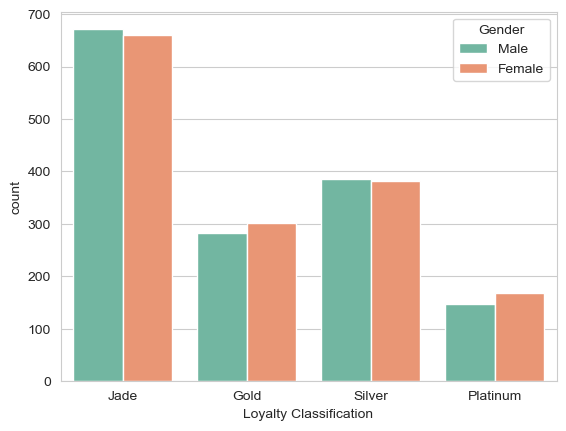

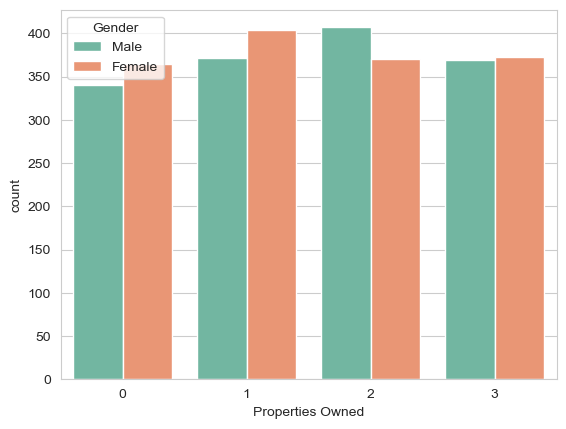

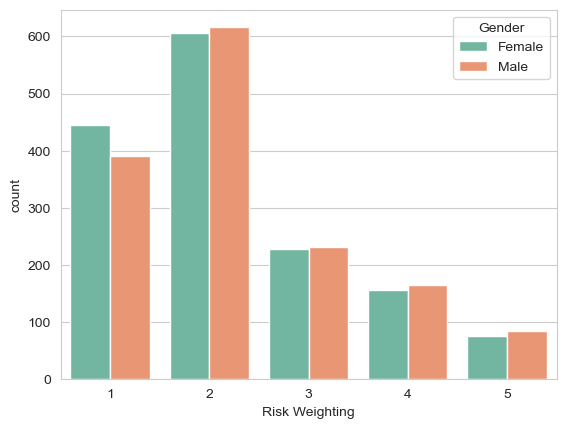

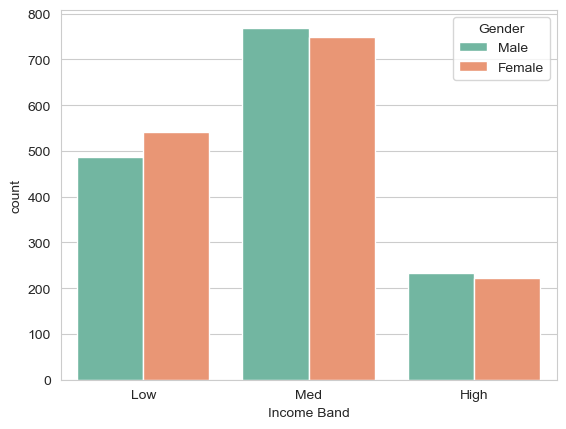

In [59]:
sns.set_style("whitegrid")               # Clean background
sns.set_palette("Set2")                  # Soft and beautiful colors

for i, predictor in enumerate(df[["Banking Relationship", "Amount of Credit Cards", "Gender", "Fee Structure", 
          "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]]):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Gender')

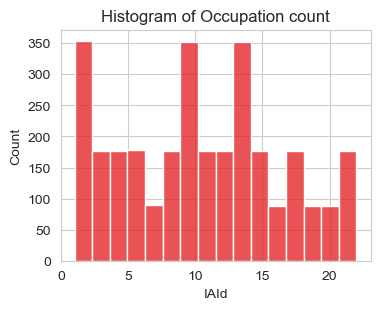

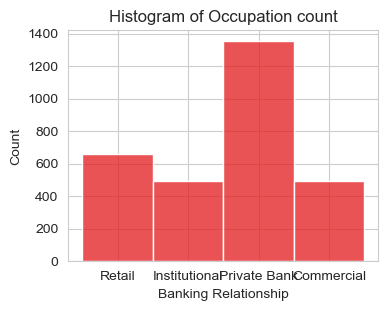

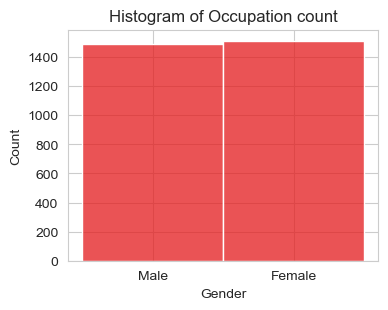

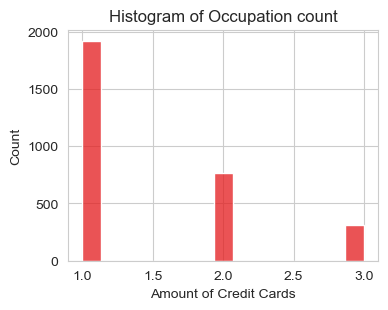

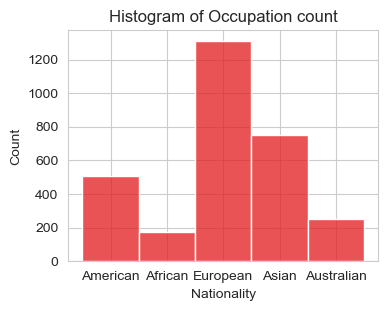

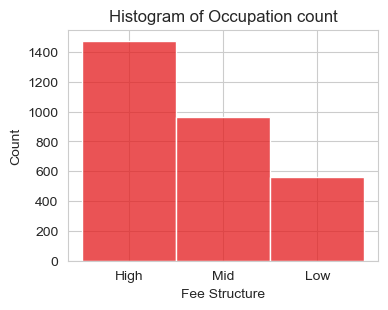

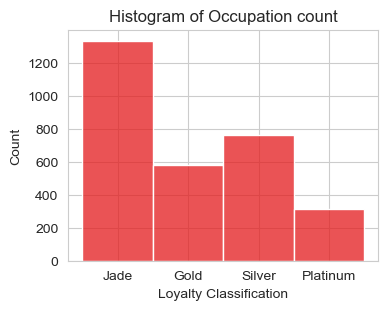

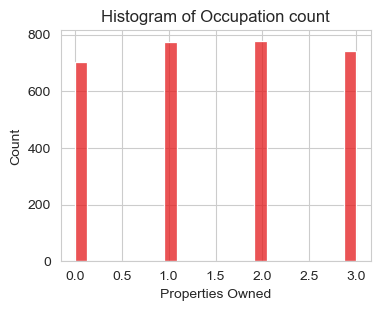

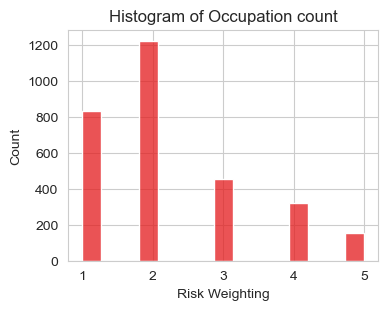

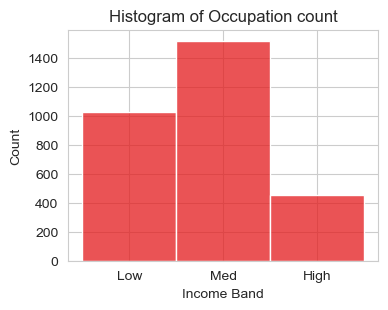

In [62]:
# HIstplot of value counts for different Occupation

cat1 = df[["Occupation", "IAId", "Banking Relationship", "Gender", "Amount of Credit Cards", "Nationality", "Fee Structure", 
          "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]]

sns.set_style("whitegrid")               # Clean background
sns.set_palette("Set1") 
for i in cat:
    if i == "Occupation":
        continue
    plt.figure(figsize=(4,3))
    sns.histplot(df[i])
    plt.title("Histogram of Occupation count")
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.show()

## Numerical Analysis

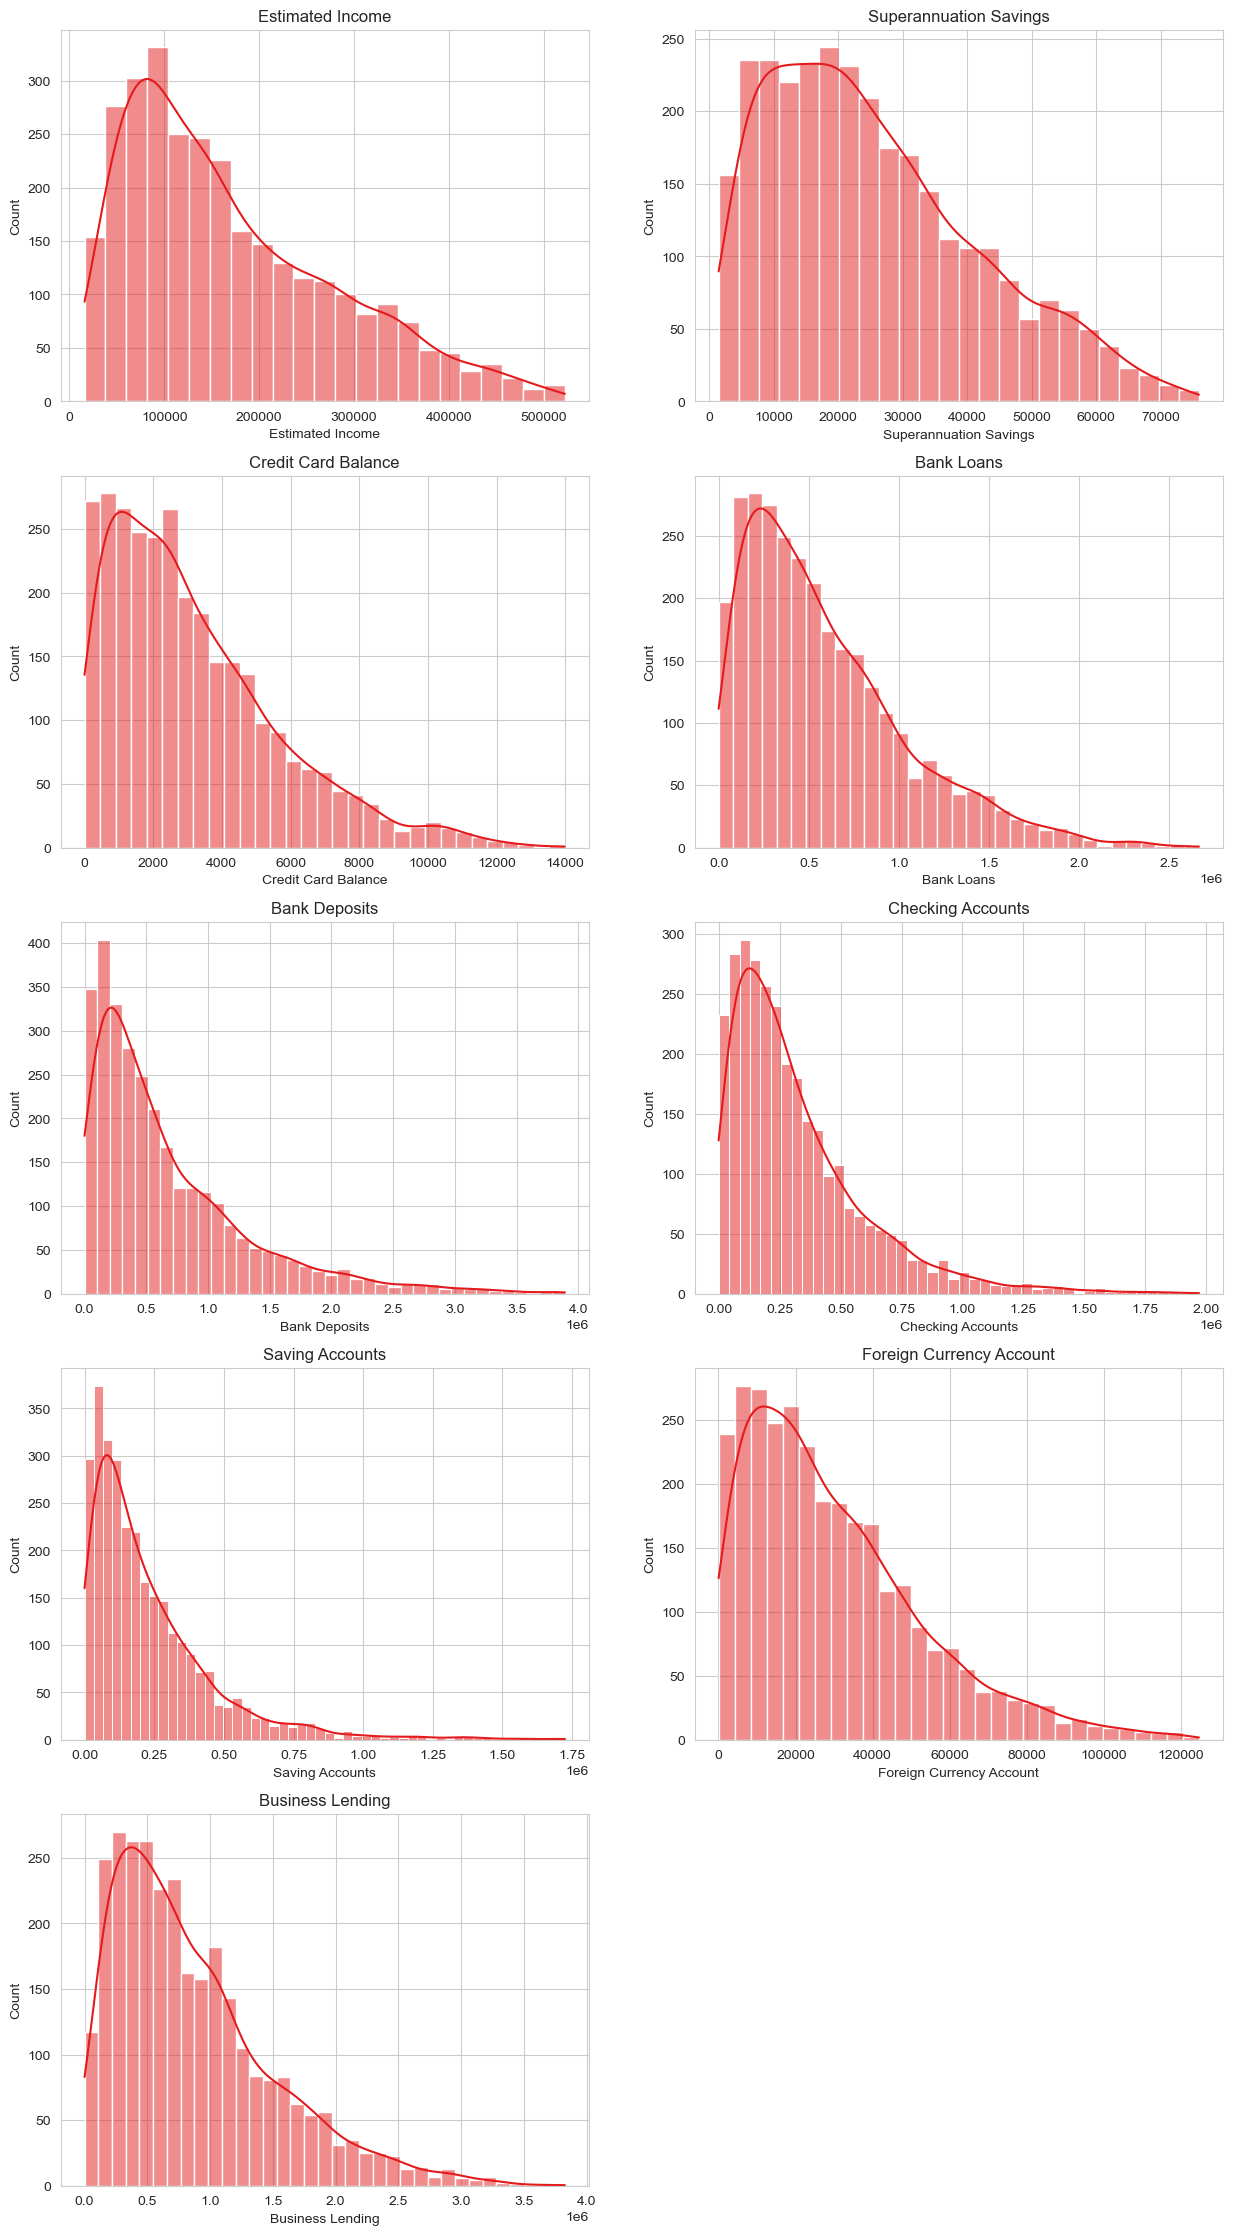

In [77]:
num_df = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending']

                  # Soft and beautiful colors

plt.figure(figsize=[15,28])
for i, col in enumerate(num_df):
    plt.subplot(5,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.show()

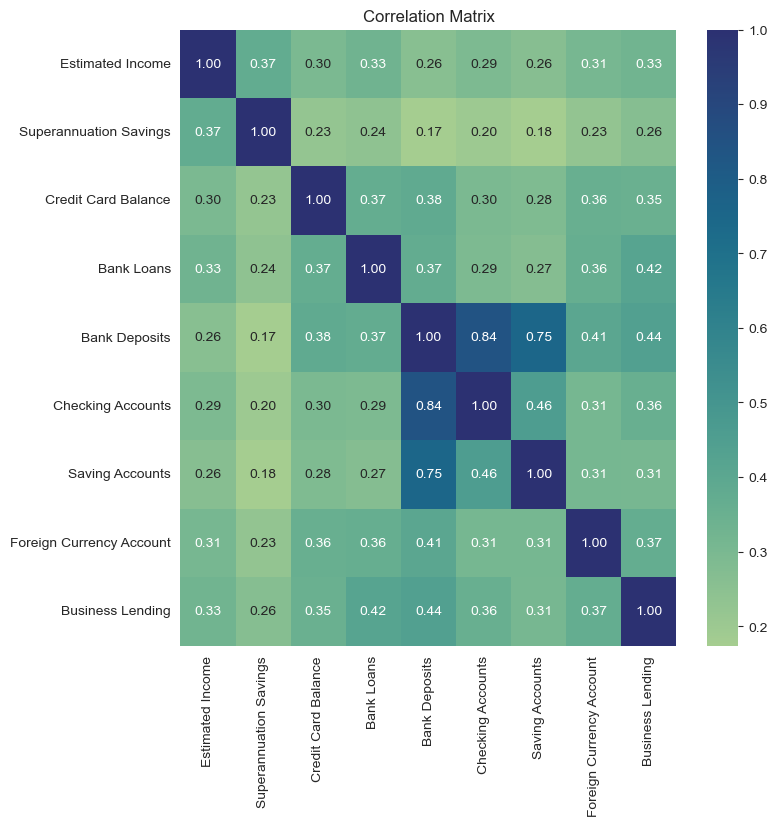

In [79]:
num_df = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending']

corr_mat = df[num_df].corr()

plt.figure(figsize=[8,8])
sns.heatmap(corr_mat, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [80]:
df.head()

,Client_Id,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Banking Relationship,Gender,IAId,Income Band
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,603617.88,607332.46,12249.96,1134475.30,1,2,Retail,Male,1,Low
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,229521.37,344635.16,61162.31,2000526.10,1,3,Institutional,Male,2,Med
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,652674.69,203054.35,79071.78,548137.58,1,3,Private Bank,Female,3,Med
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,234685.02,57513.65,1148402.29,0,4,Commercial,Male,4,High
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,446644.25,128351.45,30012.14,1674412.12,0,3,Retail,Female,5,Med


In [83]:
num_df

['Estimated Income',
 'Superannuation Savings',
 'Credit Card Balance',
 'Bank Loans',
 'Bank Deposits',
 'Checking Accounts',
 'Saving Accounts',
 'Foreign Currency Account',
 'Business Lending']

In [84]:
df[num_df].describe()

,Estimated Income,Superannuation Savings,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending
count,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03
mean,171305.034263,25531.599673,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05
std,111935.808209,16259.950770,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05
min,15919.480000,1482.030000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00
25%,82906.595000,12513.775000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05
50%,142313.480000,22357.355000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05
75%,242290.305000,35464.740000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06
max,522330.260000,75963.900000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06


## Deposits and Savings Behavior
#### The high correlation between Bank Deposits and Saving Accounts suggests that these may either measure overlapping financial behavior (e.g., total funds a customer keeps in the bank) or that people who actively deposit funds also tend to maintain or grow savings balances.

## Income, Age, and Accumulation
#### Moderate correlations of Age and Estimated Income with various balances (Superannuation, Savings, Checking) reflect a common financial lifecycle trend: higher income earners and older individuals often accumulate more savings, retirement funds, and may carry higher credit card balances or loans.

## Low Correlation with Properties Owned
#### Property ownership may depend on external factors (location, real estate market conditions, inheritance, etc.) that are not captured by these particular banking variables. Hence, we see weaker correlations here.

## Business vs. Personal Banking
#### Business Lending’s moderate link to Bank Loans suggests some customers may have both personal and business debts. However, business lending is relatively uncorrelated with other deposit or property-related metrics, indicating it may serve a distinct subset of customers or needs.
